# Upload libraries 

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.patches as mpatches
import geopandas as gpd
from shapely.geometry import Point

# Open the cyclone dataset
### Check what is in the dataset

In [2]:
ds = xr.open_dataset("../raw_data/cyclone_data/IBTrACS.last3years.v04r01.nc")
ds

<xarray.Dataset> Size: 105MB
Dimensions:           (storm: 377, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] 1MB ...
    lat               (storm, date_time) float32 543kB ...
    lon               (storm, date_time) float32 543kB ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/159)
    numobs            (storm) float32 2kB ...
    sid               (storm) |S13 5kB ...
    season            (storm) float32 2kB ...
    number            (storm) int16 754B ...
    basin             (storm, date_time) |S2 271kB ...
    subbasin          (storm, date_time) |S2 271kB ...
    ...                ...
    reunion_gust      (storm, date_time) float32 543kB ...
    reunion_gust_per  (storm, date_time) float32 543kB ...
    usa_seahgt        (storm, date_time) float32 543kB ...
    usa_searad        (storm, date_time, quadrant) float32 2MB ...
    storm_speed       (storm, date_time) float32 543kB ...
    storm_dir         (storm, date_time) float32 543kB ...
Attributes: (12/49)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r01
    ...                         ...
    history:                    Sun Sep 28 05:45:24 2025: ncks --no_abc --cnk...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    NCO:                        netCDF Operators version 5.0.7 (Homepage = ht...

In [3]:
# Cyclone names are often in the 'name' variable
ds['name']

<xarray.DataArray 'name' (storm: 377)> Size: 48kB
[377 values with dtype=|S128]
Dimensions without coordinates: storm
Attributes:
    long_name:              Name of system
    description:            May be a combination of names from different agen...
    coverage_content_type:  thematicClassification

In [4]:
# Decode byte strings into readable names
names = ds['name'].values.astype(str)

# Check first 20 names
names[:20]


array(['TIFFANY', 'CODY', 'ANA', 'BATSIRAI', 'UNNAMED', 'CLIFF', 'EMNATI',
       'DOVI', 'DUMAKO', 'FEZILE', 'VERNON', 'UNNAMED', 'ANIKA', 'EVA',
       'UNNAMED', 'UNNAMED', 'GOMBE', 'BILLY', 'CHARLOTTE', 'UNNAMED'],
      dtype='<U128')

# Find Alfred

In [5]:
[i for i, n in enumerate(names) if "ALFRED" in n.upper()]


[308]

In [6]:
list(ds.variables)


['numobs',
 'sid',
 'season',
 'number',
 'basin',
 'subbasin',
 'name',
 'source_usa',
 'source_jma',
 'source_cma',
 'source_hko',
 'source_kma',
 'source_new',
 'source_reu',
 'source_bom',
 'source_nad',
 'source_wel',
 'source_td5',
 'source_td6',
 'source_ds8',
 'source_neu',
 'source_mlc',
 'time',
 'iso_time',
 'nature',
 'lat',
 'lon',
 'wmo_wind',
 'wmo_pres',
 'wmo_agency',
 'track_type',
 'main_track_sid',
 'dist2land',
 'landfall',
 'iflag',
 'usa_agency',
 'usa_atcf_id',
 'usa_lat',
 'usa_lon',
 'usa_record',
 'usa_status',
 'usa_wind',
 'usa_pres',
 'usa_sshs',
 'usa_r34',
 'usa_r50',
 'usa_r64',
 'usa_poci',
 'usa_roci',
 'usa_rmw',
 'usa_eye',
 'tokyo_lat',
 'tokyo_lon',
 'tokyo_grade',
 'tokyo_wind',
 'tokyo_pres',
 'tokyo_r50_dir',
 'tokyo_r50_long',
 'tokyo_r50_short',
 'tokyo_r30_dir',
 'tokyo_r30_long',
 'tokyo_r30_short',
 'tokyo_land',
 'cma_lat',
 'cma_lon',
 'cma_cat',
 'cma_wind',
 'cma_pres',
 'hko_lat',
 'hko_lon',
 'hko_cat',
 'hko_wind',
 'hko_pres',
 'km

In [7]:
# Get all indices where the storm name is ALFRED
alfred_indices = [i for i, n in enumerate(names) if "ALFRED" in n.upper()]
alfred_indices


[308]

In [8]:
# Select Alfred (index 308)
alfred_ds = ds.isel(storm=308)

alfred_ds


<xarray.Dataset> Size: 280kB
Dimensions:           (date_time: 360, quadrant: 4)
Coordinates:
    time              (date_time) datetime64[ns] 3kB ...
    lat               (date_time) float32 1kB ...
    lon               (date_time) float32 1kB ...
Dimensions without coordinates: date_time, quadrant
Data variables: (12/159)
    numobs            float32 4B ...
    sid               |S13 13B ...
    season            float32 4B ...
    number            int16 2B ...
    basin             (date_time) |S2 720B ...
    subbasin          (date_time) |S2 720B ...
    ...                ...
    reunion_gust      (date_time) float32 1kB ...
    reunion_gust_per  (date_time) float32 1kB ...
    usa_seahgt        (date_time) float32 1kB ...
    usa_searad        (date_time, quadrant) float32 6kB ...
    storm_speed       (date_time) float32 1kB ...
    storm_dir         (date_time) float32 1kB ...
Attributes: (12/49)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r01
    ...                         ...
    history:                    Sun Sep 28 05:45:24 2025: ncks --no_abc --cnk...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    NCO:                        netCDF Operators version 5.0.7 (Homepage = ht...

In [9]:
# Convert all Alfred times
alfred_time_all = pd.to_datetime(alfred_ds['time'].values)

# Print first and last timestamps
alfred_time_all.min(), alfred_time_all.max()


(Timestamp('2025-02-21 00:00:00.000039936'),
 Timestamp('2025-03-08 18:00:00.000039936'))

# Set time of interest

In [10]:
# Convert time to pandas datetime
time = pd.to_datetime(alfred_ds['time'].values)

# Define start and end dates
start = pd.Timestamp("2025-02-20")
end   = pd.Timestamp("2025-03-08")

# Mask to keep only dates in that range
time_mask = (time >= start) & (time <= end)

# Apply mask
alfred_time = time[time_mask]
alfred_lats = alfred_ds['lat'].values[time_mask]
alfred_lons = alfred_ds['lon'].values[time_mask]


# Create Map
### use matplotlib and cartopy to create map
### overlay cyclone track

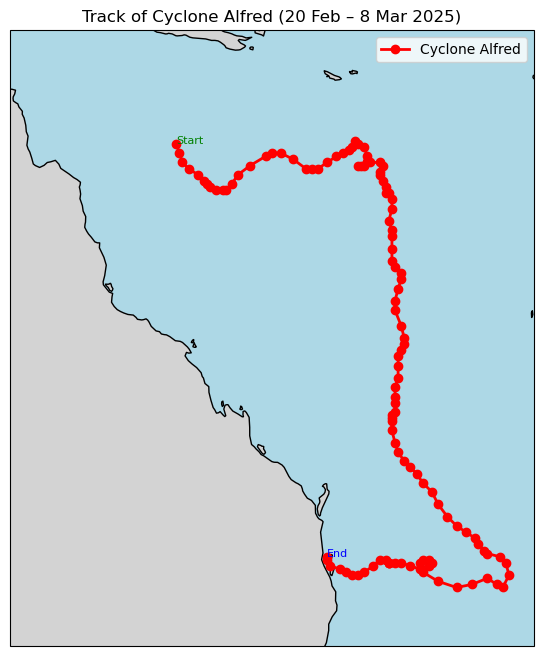

In [11]:
# Setup map
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection': ccrs.PlateCarree()})

# Focus on eastern Australia
ax.set_extent([143, 160, -30, -10], crs=ccrs.PlateCarree())

# Add base features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, facecolor="lightgrey")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")

# Plot cyclone track
ax.plot(alfred_lons, alfred_lats, marker="o", color="red", linewidth=2, label="Cyclone Alfred")

# Label start and end points
ax.text(alfred_lons[0], alfred_lats[0], "Start", fontsize=8, color="green")
ax.text(alfred_lons[-1], alfred_lats[-1], "End", fontsize=8, color="blue")

plt.title("Track of Cyclone Alfred (20 Feb – 8 Mar 2025)")
plt.legend()
plt.show()

# Define cyclone intensity
### Compare metadata

In [12]:
alfred_ds['wmo_wind'].values


array([20., nan, 30., nan, 30., nan, 30., nan, 35., nan, 40., nan, 40.,
       nan, 40., nan, 40., nan, 45., nan, 50., nan, 50., nan, 50., nan,
       50., nan, 50., nan, 55., nan, 55., nan, 55., nan, 50., nan, 55.,
       nan, 55., nan, 60., nan, 65., nan, 70., nan, 75., nan, 80., nan,
       85., nan, 85., nan, 85., nan, 85., nan, 90., nan, 80., nan, 80.,
       nan, 65., nan, 60., nan, 55., nan, 45., nan, 50., nan, 55., nan,
       50., nan, 50., nan, 50., nan, 50., nan, 50., nan, 50., nan, 55.,
       nan, 50., nan, 45., nan, 45., nan, 45., nan, 45., nan, 50., nan,
       50., nan, 50., nan, 50., nan, 50., nan, 45., nan, 45., nan, 45.,
       35., 35., nan, 30., nan, 30., nan, 40., 40., 40., nan, 25., nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [13]:
alfred_ds['usa_wind'].values


array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  35.,
        37.,  39.,  39.,  39.,  45.,  51.,  51.,  51.,  53.,  54.,  54.,
        54.,  57.,  60.,  60.,  60.,  62.,  64.,  62.,  60.,  62.,  64.,
        69.,  74.,  74.,  74.,  74.,  74.,  77.,  79.,  82.,  84.,  84.,
        84.,  87.,  89.,  91.,  93., 101., 109., 112., 115., 104.,  93.,
        99., 105., 105., 105., 105., 105., 105., 105., 100.,  95.,  89.,
        84.,  77.,  70.,  65.,  60.,  57.,  54.,  53.,  51.,  51.,  51.,
        53.,  54.,  53.,  51.,  48.,  45.,  48.,  51.,  53.,  54.,  54.,
        54.,  54.,  54.,  54.,  54.,  54.,  54.,  54.,  54.,  54.,  54.,
        54.,  54.,  53.,  51.,  51.,  51.,  51.,  51.,  51.,  51.,  48.,
        45.,  45.,  45.,  45.,  45.,  45.,  45.,  40.,  35.,  35.,  35.,
        35.,  35.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  n

In [14]:
np.isnan(alfred_ds['wmo_wind'].values[time_mask]).sum(), np.isnan(alfred_ds['usa_wind'].values[time_mask]).sum()


(np.int64(59), np.int64(10))

### Choose data with most values and void NAs

In [15]:
# Extract USA 1-min sustained winds (knots)
wind_raw = alfred_ds['usa_wind'].values[time_mask]

# Replace NaNs with 0 so they classify as "Tropical Low"
wind = np.nan_to_num(wind_raw, nan=0.0)


### Classify using the Saffir-Simpson Hurricane Scale

In [16]:
def classify_sshs(w):
    if w < 34:
        return "Tropical Depression"
    elif 34 <= w <= 63:
        return "Tropical Storm"
    elif 64 <= w <= 82:
        return "Category 1"
    elif 83 <= w <= 95:
        return "Category 2"
    elif 96 <= w <= 112:
        return "Category 3"
    elif 113 <= w <= 136:
        return "Category 4"
    else:
        return "Category 5"

categories = [classify_sshs(w) for w in wind]

In [17]:
category_colors = {
    "Tropical Depression": "lightblue",
    "Tropical Storm": "green",
    "Category 1": "yellow",
    "Category 2": "orange",
    "Category 3": "red",
    "Category 4": "purple",
    "Category 5": "black"
}

# Create map 
### Define cyclone trck intensity 

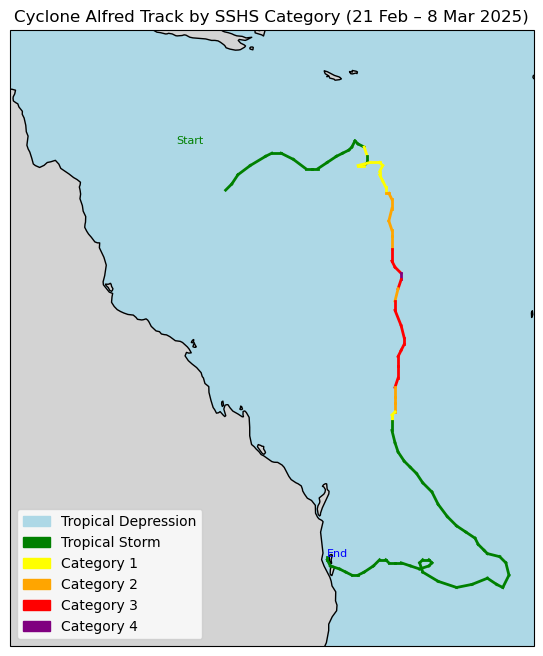

In [18]:

fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([143, 160, -30, -10], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, facecolor="lightgrey")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")

# Plot each track segment with SSHS category colours
for i in range(len(alfred_lons)-1):
    cat = categories[i]
    ax.plot([alfred_lons[i], alfred_lons[i+1]], 
            [alfred_lats[i], alfred_lats[i+1]], 
            color=category_colors[cat], 
            linewidth=2)

# Start and end markers
ax.text(alfred_lons[0], alfred_lats[0], "Start", fontsize=8, color="green")
ax.text(alfred_lons[-1], alfred_lats[-1], "End", fontsize=8, color="blue")

# Legend
legend_patches = [mpatches.Patch(color=c, label=k) for k,c in category_colors.items() if k in categories]
plt.legend(handles=legend_patches, loc="lower left")

plt.title("Cyclone Alfred Track by SSHS Category (21 Feb – 8 Mar 2025)")
plt.show()

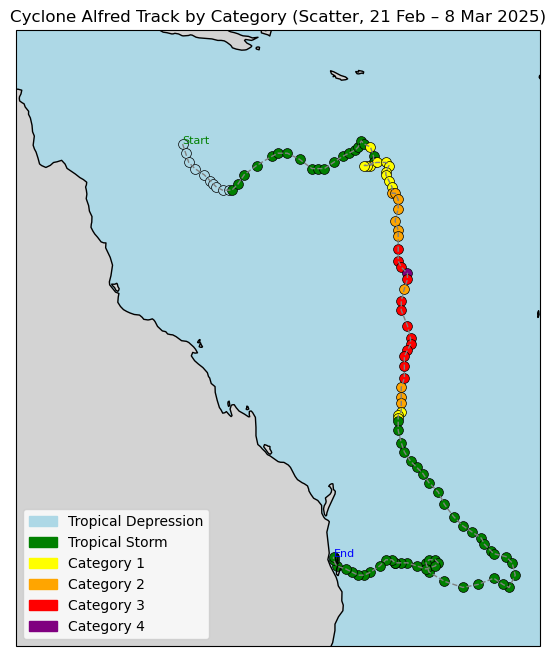

In [19]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection': ccrs.PlateCarree()})

# Focus on eastern Australia
ax.set_extent([143, 160, -30, -10], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, facecolor="lightgrey")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")

# Plot each point as a scatter, coloured by category
for lon, lat, cat in zip(alfred_lons, alfred_lats, categories):
    ax.scatter(lon, lat, color=category_colors[cat], s=50, transform=ccrs.PlateCarree(), edgecolor="k", linewidth=0.5)

# Connect points with a thin line for continuity
ax.plot(alfred_lons, alfred_lats, color="grey", linewidth=1, linestyle="--")

# Mark start and end
ax.text(alfred_lons[0], alfred_lats[0], "Start", fontsize=8, color="green")
ax.text(alfred_lons[-1], alfred_lats[-1], "End", fontsize=8, color="blue")

# Legend
legend_patches = [mpatches.Patch(color=c, label=k) for k,c in category_colors.items() if k in categories]
plt.legend(handles=legend_patches, loc="lower left")

plt.title("Cyclone Alfred Track by Category (Scatter, 21 Feb – 8 Mar 2025)")
plt.show()

# Define Region of Interest 
### Import and replot map to include ROI

In [20]:
# Load CSV of selected points
cb_points = pd.read_csv(".../raw_data/cyclone_data/selected_points.csv")

cb_points.head()

,lon,lat,label
0,151.60027,-23.99987,439914
1,151.66693,-23.99987,439915
2,151.73360,-23.99987,439916
3,151.80026,-23.99987,439917
4,151.86693,-23.99987,439918


In [21]:
# Plot each CB point
ax.scatter(cb_points["lon"], cb_points["lat"],
           color="darkblue", s=40, marker="^",
           transform=ccrs.PlateCarree(), label="Capricorn Bunker Points")

# Optional: label each point with its name (if a 'name' column exists)
if "name" in cb_points.columns:
    for lon, lat, name in zip(cb_points["lon"], cb_points["lat"], cb_points["name"]):
        ax.text(lon+0.1, lat+0.1, name, fontsize=7, transform=ccrs.PlateCarree())


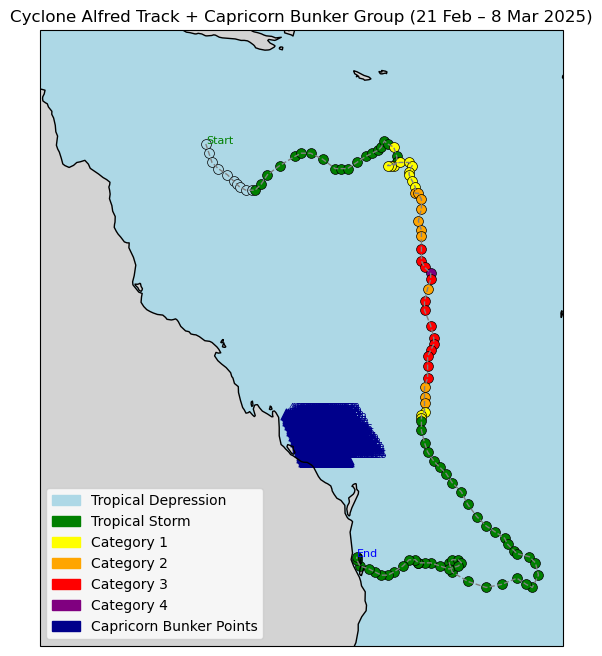

In [22]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection': ccrs.PlateCarree()})

# Zoom into eastern QLD
ax.set_extent([143, 160, -30, -10], crs=ccrs.PlateCarree())

# Base map
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, facecolor="lightgrey")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")

# --- Cyclone Alfred scatter points ---
for lon, lat, cat in zip(alfred_lons, alfred_lats, categories):
    ax.scatter(lon, lat, color=category_colors[cat], s=50,
               transform=ccrs.PlateCarree(), edgecolor="k", linewidth=0.5)

# Connect track
ax.plot(alfred_lons, alfred_lats, color="grey", linewidth=1, linestyle="--")

# Start/End
ax.text(alfred_lons[0], alfred_lats[0], "Start", fontsize=8, color="green")
ax.text(alfred_lons[-1], alfred_lats[-1], "End", fontsize=8, color="blue")

# --- Capricorn Bunker points ---
ax.scatter(cb_points["lon"], cb_points["lat"],
           color="darkblue", marker="^", s=60,
           transform=ccrs.PlateCarree(), label="Capricorn Bunker Points")

# Add labels
for lon, lat, label in zip(cb_points["lon"], cb_points["lat"], cb_points["label"]):
    ax.text(lon+0.1, lat+0.1, str(label), fontsize=7, color="darkblue",
            transform=ccrs.PlateCarree())

# Legend
legend_patches = [mpatches.Patch(color=c, label=k) for k,c in category_colors.items() if k in categories]
plt.legend(handles=legend_patches + 
           [mpatches.Patch(facecolor="darkblue", edgecolor="darkblue", label="Capricorn Bunker Points")],
           loc="lower left")

plt.title("Cyclone Alfred Track + Capricorn Bunker Group (21 Feb – 8 Mar 2025)")
plt.show()


In [23]:
# Load points
cb_points = pd.read_csv(".../raw_data/cyclone_data/selected_points.csv")

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(cb_points["lon"], cb_points["lat"])]
gdf = gpd.GeoDataFrame(cb_points, geometry=geometry, crs="EPSG:4326")

# Create convex hull polygon (outline of all points)
# Create convex hull polygon (outline of all points)
roi = gdf.union_all().convex_hull
roi_gdf = gpd.GeoDataFrame(geometry=[roi], crs="EPSG:4326")


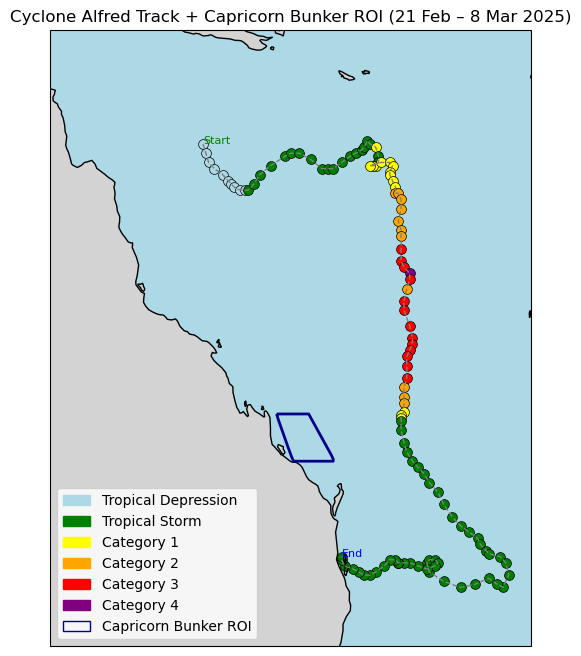

In [24]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection': ccrs.PlateCarree()})

# Zoom into eastern QLD
ax.set_extent([143, 160, -30, -10], crs=ccrs.PlateCarree())

# Base map
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, facecolor="lightgrey")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")

# Cyclone Alfred points (scatter)
for lon, lat, cat in zip(alfred_lons, alfred_lats, categories):
    ax.scatter(lon, lat, color=category_colors[cat], s=50,
               transform=ccrs.PlateCarree(), edgecolor="k", linewidth=0.5)

# Track line
ax.plot(alfred_lons, alfred_lats, color="grey", linewidth=1, linestyle="--")

# Start / End markers
ax.text(alfred_lons[0], alfred_lats[0], "Start", fontsize=8, color="green")
ax.text(alfred_lons[-1], alfred_lats[-1], "End", fontsize=8, color="blue")

# ROI outline (Capricorn Bunker Group)
roi_gdf.boundary.plot(ax=ax, transform=ccrs.PlateCarree(),
                      color="darkblue", linewidth=2, label="Capricorn Bunker ROI")

# Legend
legend_patches = [mpatches.Patch(color=c, label=k) for k,c in category_colors.items() if k in categories]
plt.legend(handles=legend_patches + 
           [mpatches.Patch(facecolor="none", edgecolor="darkblue", label="Capricorn Bunker ROI")],
           loc="lower left")

plt.title("Cyclone Alfred Track + Capricorn Bunker ROI (21 Feb – 8 Mar 2025)")
plt.show()

# Import Capricorn Bunker Reefs
### Add to map

In [25]:
# Load Capricorn Bunker reefs CSV
reefs = pd.read_csv(".../raw_data/cyclone_data/capricorn_bunker_reefs.csv")

reefs.head()

,REEF_NAME,LATITUDE,LONGITUDE
0,NORTH REEF (NORTH),-23.183333,151.908333
1,BROOMFIELD REEF,-23.275000,151.941667
2,WRECK ISLAND REEF,-23.333333,151.966667
3,ONE TREE REEF,-23.500000,152.066667
4,FITZROY REEF,-23.625000,152.158333


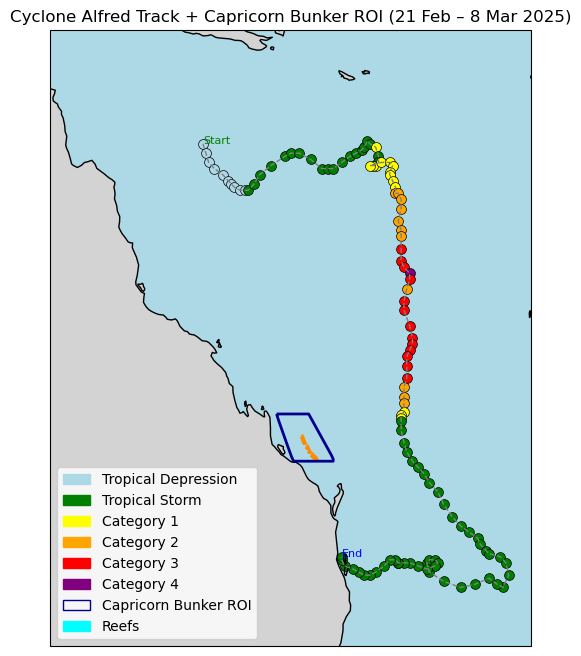

In [27]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection': ccrs.PlateCarree()})

# Zoom into eastern QLD
ax.set_extent([143, 160, -30, -10], crs=ccrs.PlateCarree())

# Base map
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, facecolor="lightgrey")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")

# Cyclone Alfred points (scatter)
for lon, lat, cat in zip(alfred_lons, alfred_lats, categories):
    ax.scatter(lon, lat, color=category_colors[cat], s=50,
               transform=ccrs.PlateCarree(), edgecolor="k", linewidth=0.5)

# Track line
ax.plot(alfred_lons, alfred_lats, color="grey", linewidth=1, linestyle="--")

# Start / End markers
ax.text(alfred_lons[0], alfred_lats[0], "Start", fontsize=8, color="green")
ax.text(alfred_lons[-1], alfred_lats[-1], "End", fontsize=8, color="blue")

# ROI outline (Capricorn Bunker Group)
roi_gdf.boundary.plot(ax=ax, transform=ccrs.PlateCarree(),
                      color="darkblue", linewidth=2, label="Capricorn Bunker ROI")

# Plot reef points
ax.scatter(reefs["LONGITUDE"], reefs["LATITUDE"],
           color="darkorange", marker="^", s=7,
           transform=ccrs.PlateCarree(), label="Reefs")

# Optional: add reef labels if column exists
if "reef_name" in reefs.columns:
    for lon, lat, name in zip(reefs["LONGITUDE"], reefs["LATITUDE"], reefs["reef_name"]):
        ax.text(lon+0.1, lat+0.1, name, fontsize=7, color="cyan",
                transform=ccrs.PlateCarree())

# Legend
legend_patches = [mpatches.Patch(color=c, label=k) for k,c in category_colors.items() if k in categories]
plt.legend(handles=legend_patches + 
           [mpatches.Patch(facecolor="none", edgecolor="darkblue", label="Capricorn Bunker ROI"),
            mpatches.Patch(facecolor="cyan", edgecolor="cyan", label="Reefs")],
           loc="lower left")

plt.title("Cyclone Alfred Track + Capricorn Bunker ROI (21 Feb – 8 Mar 2025)")
plt.show()